Group F Computing Practicum Project

Nevzat Umut Demirseren

Kramer Leitman

Husein Fejzic

Pushkar Prajapati

In [532]:
import pandas as pd
import numpy as np
import seaborn as sns
import random as rd
import matplotlib.pyplot as plt 
import math

#from %pip install scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import label_binarize
from sklearn.utils import shuffle
from itertools import cycle

# Exploratory Data Analysis (EDA)

### Read Data

In [533]:
salary_data = pd.read_csv("./data/jobs_in_data.csv");

In [534]:
employment_rate_monthly = pd.read_csv("./data/supplementary/employment_rate_monthly.csv");

In [535]:
employment_rate_quarterly = pd.read_csv("./data/supplementary/employment_rate_quarterly.csv");

In [536]:
inflation_monthly = pd.read_csv("./data/supplementary/inflation_monthly.csv");

In [537]:
inflation_quarterly = pd.read_csv("./data/supplementary/inflation_quarterly.csv");

In [538]:
price_level = pd.read_csv("./data/supplementary/price_level.csv");

### Analyze Data

In order to analyze data, we are using global variables to store residence countries and company location countries.

In [539]:
employee_residence_countries = salary_data['employee_residence'].value_counts().index.tolist()
company_location_countries = salary_data['company_location'].value_counts().index.tolist()

print("Employee Residence Countries (descending order): " + str(employee_residence_countries))
print("Company Location Countries (descending order):   " + str(company_location_countries))

Employee Residence Countries (descending order): ['United States', 'United Kingdom', 'Canada', 'Spain', 'Germany', 'France', 'Portugal', 'Netherlands', 'Australia', 'Italy', 'Brazil', 'Greece', 'Colombia', 'India', 'Nigeria', 'Poland', 'Estonia', 'Argentina', 'Mexico', 'Ireland', 'Turkey', 'Ukraine', 'Belgium', 'Russia', 'Austria', 'Latvia', 'Pakistan', 'Slovenia', 'Singapore', 'Switzerland', 'Puerto Rico', 'Croatia', 'Ghana', 'Romania', 'Lithuania', 'Japan', 'Philippines', 'Denmark', 'Uzbekistan', 'United Arab Emirates', 'Finland', 'Sweden', 'Saudi Arabia', 'Egypt', 'Vietnam', 'Central African Republic', 'Bolivia', 'Moldova', 'South Korea', 'South Africa', 'Czech Republic', 'Thailand', 'Armenia', 'Kenya', 'Tunisia', 'Dominican Republic', 'Iraq', 'Jersey', 'Algeria', 'Honduras', 'Hong Kong', 'Malaysia', 'Luxembourg', 'Indonesia', 'Bulgaria', 'Serbia', 'New Zealand', 'Ecuador', 'Chile', 'Costa Rica', 'China', 'American Samoa', 'Iran', 'Bosnia and Herzegovina', 'Cyprus', 'Kuwait', 'Georg

#### Salary Data

For the given data, each parameter which could be correlated to salary is analyzed and visualized.

Distribution data such as experience level are visualized using pie chart.\
Change over time is visualized using plot.\
Trend data such as job category are visualized using bar chart.

In [540]:
print(salary_data.columns.tolist())

['work_year', 'job_title', 'job_category', 'salary_currency', 'salary', 'salary_in_usd', 'employee_residence', 'experience_level', 'employment_type', 'work_setting', 'company_location', 'company_size']


##### Job Title

In [541]:
print(salary_data['job_title'].value_counts())

job_title
Data Engineer                     2195
Data Scientist                    1989
Data Analyst                      1388
Machine Learning Engineer          991
Applied Scientist                  272
                                  ... 
Consultant Data Engineer             1
Sales Data Analyst                   1
Managing Director Data Science       1
AWS Data Architect                   1
Deep Learning Researcher             1
Name: count, Length: 125, dtype: int64


##### Job Category

In [542]:
print(salary_data['job_category'].value_counts()) # Print number of jobs in each employment type

job_category
Data Science and Research         3014
Data Engineering                  2260
Data Analysis                     1457
Machine Learning and AI           1428
Leadership and Management          503
BI and Visualization               313
Data Architecture and Modeling     259
Data Management and Strategy        61
Data Quality and Operations         55
Cloud and Database                   5
Name: count, dtype: int64


Axes(0.125,0.11;0.775x0.77)


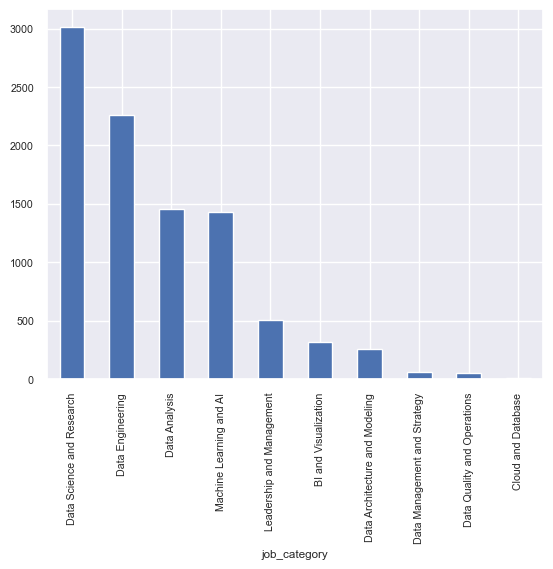

In [543]:
print(salary_data['job_category'].value_counts().plot(kind='bar')) # Plot number of jobs in each employment type

##### Employee Residence

In [544]:
print(salary_data['employee_residence'].value_counts()) # Print number of jobs in each employee residence

employee_residence
United States     8086
United Kingdom     442
Canada             224
Spain              117
Germany             66
                  ... 
Andorra              1
Qatar                1
Mauritius            1
Uganda               1
Malta                1
Name: count, Length: 83, dtype: int64


##### Experience Level

In [545]:
print(salary_data['experience_level'].value_counts())

experience_level
Senior         6709
Mid-level      1869
Entry-level     496
Executive       281
Name: count, dtype: int64


Axes(0.22375,0.11;0.5775x0.77)


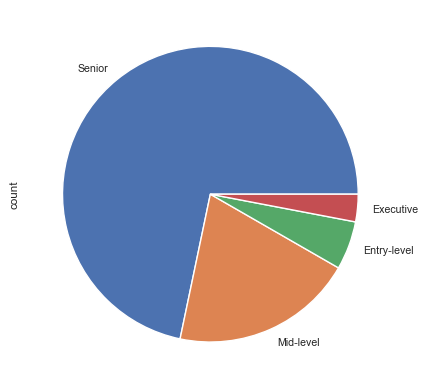

In [546]:
print(salary_data['experience_level'].value_counts().plot(kind='pie')) # Plot number of jobs in each experience level

##### Work Setting

In [547]:
print(salary_data['work_setting'].value_counts()) # Print number of jobs in each employment type

work_setting
In-person    5730
Remote       3434
Hybrid        191
Name: count, dtype: int64


##### Company Location

In [548]:
print(salary_data['company_location'].value_counts()) # Plot number of jobs in each employment type

company_location
United States     8132
United Kingdom     449
Canada             226
Spain              113
Germany             72
                  ... 
Gibraltar            1
Ecuador              1
Andorra              1
Mauritius            1
Malta                1
Name: count, Length: 70, dtype: int64


##### Company Size

In [549]:
print(salary_data['company_size'].value_counts()) # Print company size counts

company_size
M    8448
L     748
S     159
Name: count, dtype: int64


Axes(0.22375,0.11;0.5775x0.77)


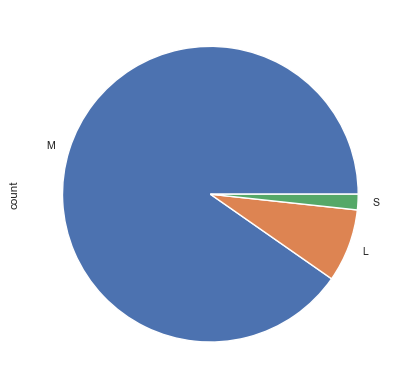

In [550]:
print(salary_data['company_size'].value_counts().plot(kind='pie')) # Plot company size counts

#### Employment Rate Data

In [551]:
# DROPS THE FIRST ROW FOR CONVERSION
# USE CAREFULLY

employment_rate_monthly = employment_rate_monthly.transpose() # Transpose the dataset

keys_extracted = employment_rate_monthly.iloc[0].to_list()

counter = 0
for key in keys_extracted:
    employment_rate_monthly.rename(columns = {counter:key}, inplace = True)
    counter += 1

employment_rate_monthly = employment_rate_monthly.iloc[1:, :] # Remove the first row

In [552]:
print(employment_rate_monthly.columns.to_list())

['Australia', 'Canada', 'Chile', 'Colombia', 'Japan', 'Korea', 'Russia', 'United States']


Display the plot for monthly employment rate of the countries.

In [553]:
# DROPS THE FIRST ROW FOR CONVERSION
# USE CAREFULLY

employment_rate_quarterly = employment_rate_quarterly.transpose() # Transpose the dataset

keys_extracted = employment_rate_quarterly.iloc[0].to_list()

counter = 0
for key in keys_extracted:
    employment_rate_quarterly.rename(columns = {counter:key}, inplace = True)
    counter += 1

employment_rate_quarterly = employment_rate_quarterly.iloc[1:, :] # Remove the first row

In [554]:
employment_rate_quarterly.rename(columns = {'Türkiye':'Turkey'}, inplace = True) # Rename the column

In [555]:
print(employment_rate_quarterly.columns.to_list())

['Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Korea', 'Latvia', 'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal', 'Russia', 'Slovak Republic', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom', 'United States']


Display the plot for quarterly employment rate of the countries.

Axes(0.125,0.11;0.775x0.77)


C:\Users\nevza\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9662 (\N{BLACK DOWN-POINTING SMALL TRIANGLE}) missing from current font.
  func(*args, **kwargs)
C:\Users\nevza\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9662 (\N{BLACK DOWN-POINTING SMALL TRIANGLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


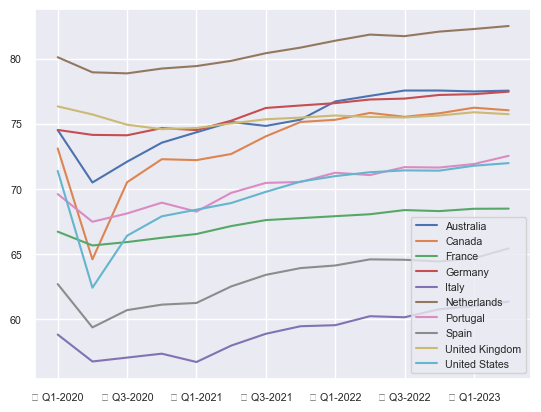

In [556]:
most_frequent_countries_residence = employee_residence_countries[0:10]

copy_employment_rate_quarterly = employment_rate_quarterly.copy()
for country in copy_employment_rate_quarterly.columns.to_list():
    if country not in most_frequent_countries_residence:
        copy_employment_rate_quarterly.drop(columns = country, inplace = True)

print(copy_employment_rate_quarterly.plot()) # Plot the employment rate for the most frequent countries

#### Inflation Data

In [557]:
# DROPS THE FIRST ROW FOR CONVERSION
# USE CAREFULLY

inflation_monthly = inflation_monthly.transpose() # Transpose the dataset

keys_extracted = inflation_monthly.iloc[0].to_list()

counter = 0
for key in keys_extracted:
    inflation_monthly.rename(columns = {counter:key}, inplace = True)
    counter += 1

inflation_monthly = inflation_monthly.iloc[1:, :] # Remove the first row

In [558]:
inflation_monthly.rename(columns = {'Türkiye':'Turkey'}, inplace = True) # Rename the column

In [559]:
print(inflation_monthly.columns.to_list())

['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile', "China (People's Republic of)", 'Colombia', 'Costa Rica', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan', 'Korea', 'Latvia', 'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Russia', 'Saudi Arabia', 'Slovak Republic', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom', 'United States']


Display the plot for monthly inflation of the countries.

Axes(0.125,0.11;0.775x0.77)


C:\Users\nevza\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9662 (\N{BLACK DOWN-POINTING SMALL TRIANGLE}) missing from current font.
  func(*args, **kwargs)
C:\Users\nevza\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9662 (\N{BLACK DOWN-POINTING SMALL TRIANGLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


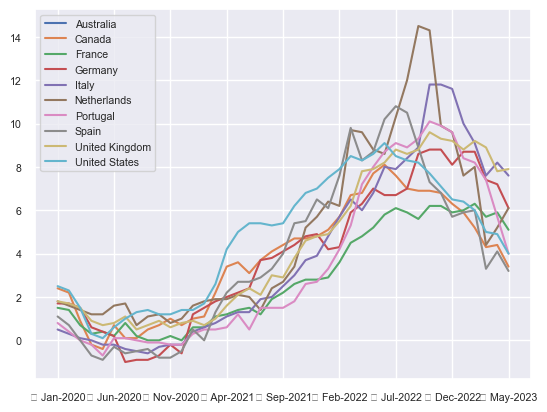

In [560]:
most_frequent_countries_residence = employee_residence_countries[0:10]

copy_inflation_monthly = inflation_monthly.copy()
for country in copy_inflation_monthly.columns.to_list():
    if country not in most_frequent_countries_residence:
        copy_inflation_monthly.drop(columns = country, inplace = True)

print(copy_inflation_monthly.plot())

In [561]:
# DROPS THE FIRST ROW FOR CONVERSION
# USE CAREFULLY

inflation_quarterly = inflation_quarterly.transpose() # Transpose the dataset

keys_extracted = inflation_quarterly.iloc[0].to_list()

counter = 0
for key in keys_extracted:
    inflation_quarterly.rename(columns = {counter:key}, inplace = True)
    counter += 1

inflation_quarterly = inflation_quarterly.iloc[1:, :] # Remove the first row

In [562]:
inflation_quarterly.rename(columns = {'Türkiye':'Turkey'}, inplace = True) # Rename the column

In [563]:
print(inflation_quarterly.columns.to_list())

['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile', "China (People's Republic of)", 'Colombia', 'Costa Rica', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan', 'Korea', 'Latvia', 'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal', 'Russia', 'Saudi Arabia', 'Slovak Republic', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom', 'United States']


Display the plot for quarterly inflation of the countries.

Axes(0.125,0.11;0.775x0.77)


C:\Users\nevza\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9662 (\N{BLACK DOWN-POINTING SMALL TRIANGLE}) missing from current font.
  func(*args, **kwargs)
C:\Users\nevza\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9662 (\N{BLACK DOWN-POINTING SMALL TRIANGLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


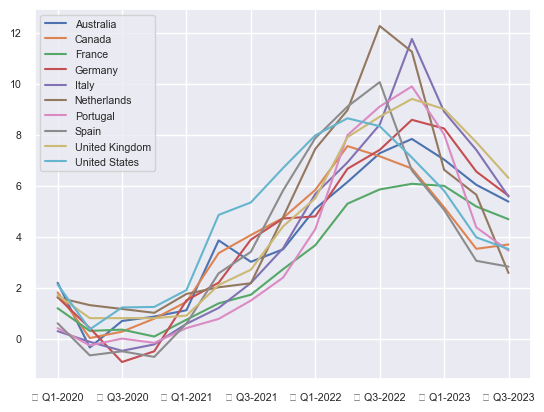

In [564]:
most_frequent_countries_residence = employee_residence_countries[0:10]

copy_inflation_quarterly = inflation_quarterly.copy()
for country in copy_inflation_quarterly.columns.to_list():
    if country not in most_frequent_countries_residence:
        copy_inflation_quarterly.drop(columns = country, inplace = True)

print(copy_inflation_quarterly.plot())

#### Price Level Data

In [565]:
# DROPS THE FIRST ROW FOR CONVERSION
# USE CAREFULLY

price_level = price_level.transpose() # Transpose the dataset

keys_extracted = price_level.iloc[0].to_list()

counter = 0
for key in keys_extracted:
    price_level.rename(columns = {counter:key}, inplace = True)
    counter += 1

price_level = price_level.iloc[1:, :] # Remove the first row

In [566]:
price_level.rename(columns = {'Türkiye':'Turkey'}, inplace = True) # Rename the column

In [567]:
print(price_level.columns.to_list())

['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile', "China (People's Republic of)", 'Colombia', 'Costa Rica', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan', 'Korea', 'Latvia', 'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal', 'Russia', 'Slovak Republic', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom', 'United States']


Display the plot for yearly price level of the countries.

Axes(0.125,0.11;0.775x0.77)


C:\Users\nevza\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9662 (\N{BLACK DOWN-POINTING SMALL TRIANGLE}) missing from current font.
  func(*args, **kwargs)
C:\Users\nevza\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9662 (\N{BLACK DOWN-POINTING SMALL TRIANGLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


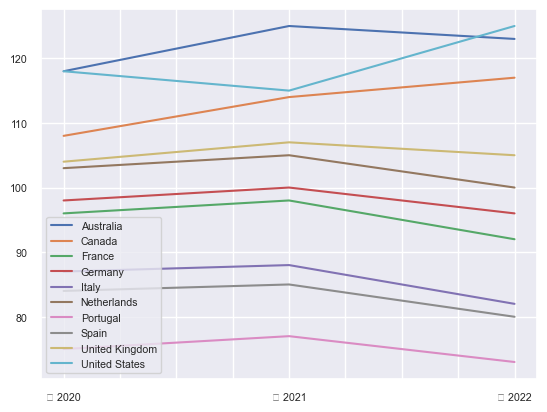

In [568]:
most_frequent_countries_residence = employee_residence_countries[0:10]

copy_price_level = price_level.copy()
for country in copy_price_level.columns.to_list():
    if country not in most_frequent_countries_residence:
        copy_price_level.drop(columns = country, inplace = True)

print(copy_price_level.plot())

#### Salary Data Preprocessing (for usage)

Use one hot encoding for the categorical variables

In [569]:
salary_data_encoded = pd.get_dummies(salary_data, columns = ['work_setting'], prefix='work_setting')

# Create a binary column 'is_salary_usd'
salary_data_encoded['is_salary_usd'] = (salary_data_encoded['salary_currency'] == 'USD').astype(int)
salary_data_encoded.drop(columns = 'salary_currency', inplace = True)

# Create a binary column 'is_working_in_resident_country'
salary_data_encoded['is_working_in_resident_country'] = (salary_data_encoded['employee_residence'] == salary_data_encoded['company_location']).astype(int)

# Create an integer column indicating experience level
salary_data_encoded['experience_level'] = salary_data_encoded['experience_level'].map({'Entry-level': 1, 'Mid-level': 2, 'Senior': 3, 'Executive': 4})

# Create an integer column indicating company size
salary_data_encoded['company_size'] = salary_data_encoded['company_size'].map({'S': 1, 'M': 2, 'L': 3})

Attempt to find a correlation between salary and commonness percentage of the job title and job category in the data set. 

In [570]:
job_title_counts = salary_data_encoded['job_title'].value_counts().to_dict()

for key in job_title_counts.keys():
    salary_data_encoded['job_title'] = salary_data_encoded['job_title'].replace(key, job_title_counts[key] / len(salary_data_encoded))

salary_data_encoded.rename(columns = {'job_title':'job_title_frequency'}, inplace = True)

C:\Users\nevza\AppData\Local\Temp\ipykernel_20876\305731738.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  salary_data_encoded['job_title'] = salary_data_encoded['job_title'].replace(key, job_title_counts[key] / len(salary_data_encoded))


In [571]:
job_category_counts = salary_data_encoded['job_category'].value_counts().to_dict()

for key in job_category_counts.keys():
    salary_data_encoded['job_category'] = salary_data_encoded['job_category'].replace(key, job_category_counts[key] / len(salary_data_encoded))

salary_data_encoded.rename(columns = {'job_category':'job_category_frequency'}, inplace = True)

C:\Users\nevza\AppData\Local\Temp\ipykernel_20876\2971913371.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  salary_data_encoded['job_category'] = salary_data_encoded['job_category'].replace(key, job_category_counts[key] / len(salary_data_encoded))


In [572]:
salary_data_encoded['employment_type'] = salary_data_encoded['employment_type'].map({'Full-time': 1, 'Contract': 0, 'Part-time': 0, 'Freelance': 0})
salary_data_encoded.rename(columns = {'employment_type':'is_fulltime'}, inplace = True)

Drop non numerical and not assignable to numeric columns

In [573]:
salary_data_encoded.drop(columns = ['salary', 'employee_residence', 'company_location'], inplace = True)

In [574]:
print(salary_data_encoded.head())

   work_year  job_title_frequency  job_category_frequency  salary_in_usd  \
0       2023             0.000214                0.241582          95012   
1       2023             0.022769                0.027686         186000   
2       2023             0.022769                0.027686          81800   
3       2023             0.212614                0.322181         212000   
4       2023             0.212614                0.322181          93300   

   experience_level  is_fulltime  company_size  work_setting_Hybrid  \
0                 2            1             3                 True   
1                 3            1             2                False   
2                 3            1             2                False   
3                 3            1             2                False   
4                 3            1             2                False   

   work_setting_In-person  work_setting_Remote  is_salary_usd  \
0                   False                False     

Use the employment rate

In [575]:
BASE_YEAR = 2020
CHUNK_SIZE = 4

In [576]:
employment_rate_yearly = dict()
for country in employment_rate_quarterly.columns.to_list():
    employment_rate_yearly[country] = []

for country in employment_rate_quarterly.columns.to_list():
    counter = 0
    for row in employment_rate_quarterly[country]:
        if counter % CHUNK_SIZE == 0:
            employment_rate_yearly[country].append(employment_rate_quarterly[country].iloc[counter:counter + CHUNK_SIZE].mean())
        counter += 1

df_employment_rate_yearly = pd.DataFrame(employment_rate_yearly)
counter = 0
for data in df_employment_rate_yearly:
    df_employment_rate_yearly.rename(index = {counter: BASE_YEAR + counter}, inplace = True)
    counter += 1
print(df_employment_rate_yearly)


      Australia  Austria  Belgium   Canada    Chile  Colombia  Costa Rica  \
2020    72.6525  71.7275  64.4350  70.1100  55.8525   57.8375     54.8325   
2021    74.9025  72.4025  65.2775  73.5075  58.4700   57.8525     57.1550   
2022    77.2375  74.0175  66.5375  75.6150  61.9275   61.5900     60.0600   
2023    77.5100  74.1600  66.4650  76.1300  62.7350   63.0800     59.1500   

      Czechia  Denmark  Estonia  ...   Russia  Slovak Republic  Slovenia  \
2020  74.3875  74.4025   73.495  ...  70.1775          69.4900   70.0675   
2021  74.3975  75.5350   73.995  ...  71.4675          69.4475   71.4425   
2022  75.4750  76.7800   76.415  ...      NaN          71.3300   73.1275   
2023  75.1850  76.7700   76.515  ...      NaN          71.7450   72.4400   

      South Africa    Spain   Sweden  Switzerland   Turkey  United Kingdom  \
2020       38.5375  60.9425  74.8775      79.9350  47.5175          75.385   
2021       37.0325  62.7475  75.3800      79.2675  50.2550          75.125   

Plot the employment rate of top 10 countries

Axes(0.125,0.11;0.775x0.77)


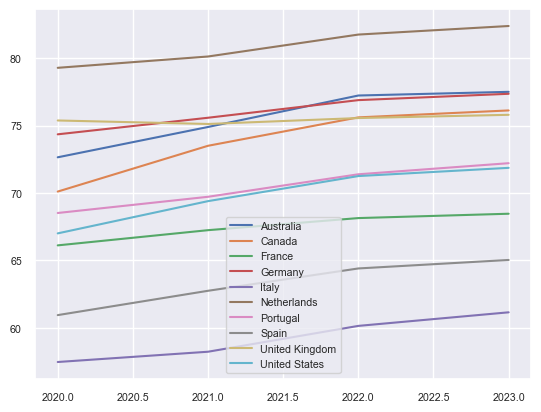

In [577]:
most_frequent_countries_residence = employee_residence_countries[0:10]

copy_employment_rate_yearly = df_employment_rate_yearly.copy()
for country in copy_employment_rate_yearly.columns.to_list():
    if country not in most_frequent_countries_residence:
        copy_employment_rate_yearly.drop(columns = country, inplace = True)

print(copy_employment_rate_yearly.plot())

In [578]:
employment_rates = []

counter = 0
for data in salary_data.iterrows():
    if data[1]['company_location'] in df_employment_rate_yearly.columns.to_list():
        employment_rates.append(df_employment_rate_yearly[data[1]['company_location']][data[1]['work_year']])
    else:
        employment_rates.append(np.nan)
    counter += 1

salary_data_encoded = salary_data_encoded.assign(employment_rate_year = employment_rates)

Use the inflation data

In [579]:
inflation_yearly = dict()
for country in inflation_quarterly.columns.to_list():
    inflation_yearly[country] = []

for country in inflation_quarterly.columns.to_list():
    counter = 0
    for row in inflation_quarterly[country]:
        if counter % CHUNK_SIZE == 0:
            inflation_yearly[country].append(inflation_quarterly[country].iloc[counter:counter + CHUNK_SIZE].mean())
        counter += 1

df_inflation_yearly = pd.DataFrame(inflation_yearly)
counter = 0
for data in df_inflation_yearly:
    df_inflation_yearly.rename(index = {counter: BASE_YEAR + counter}, inplace = True)
    counter += 1
print(df_inflation_yearly)


      Argentina  Australia  Austria   Belgium    Brazil  Canada      Chile  \
2020    42.6250     0.8475   1.3800  0.742500  3.212500   0.720   3.047500   
2021    48.1025     2.8675   2.7625  2.442500  8.285000   3.395   4.515000   
2022    70.7950     6.5825   8.5200  9.580000  9.340000   6.800  11.615000   
2023   113.6200     6.1400   8.6800  5.206667  4.563333   4.120   8.713333   

      China (People's Republic of)   Colombia  Costa Rica  ...  Saudi Arabia  \
2020                      2.440000   2.535000      0.7275  ...        3.4375   
2021                      0.985000   3.497500      1.7250  ...        3.1300   
2022                      1.975000  10.155000         NaN  ...        2.4700   
2023                      0.426667  12.376667         NaN  ...        2.5800   

      Slovak Republic  Slovenia  South Africa   Spain  Sweden  Switzerland  \
2020         1.940000   -0.0475      3.215000 -0.3200  0.4975    -0.725000   
2021         3.147500    1.9150      4.607500  3.090

Plot the inflation rate of top 10 countries

Axes(0.125,0.11;0.775x0.77)


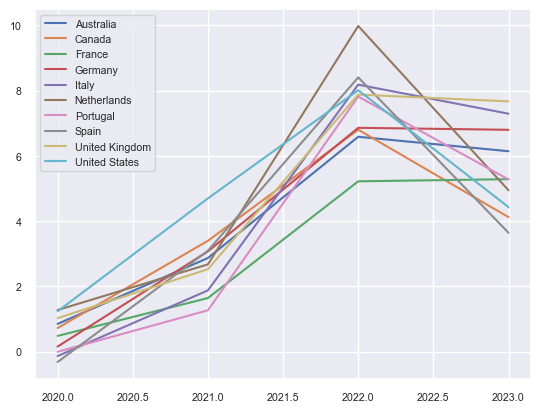

In [580]:
most_frequent_countries_residence = employee_residence_countries[0:10]

copy_inflation_yearly = df_inflation_yearly.copy()
for country in copy_inflation_yearly.columns.to_list():
    if country not in most_frequent_countries_residence:
        copy_inflation_yearly.drop(columns = country, inplace = True)

print(copy_inflation_yearly.plot())

Add new column to salary_data_encoded for inflation rate of the employment country.

In [581]:
inflations = []

counter = 0
for data in salary_data.iterrows():
    if data[1]['company_location'] in df_inflation_yearly.columns.to_list():
        inflations.append(df_inflation_yearly[data[1]['company_location']][data[1]['work_year']])
    else:
        inflations.append(np.nan)
    counter += 1

salary_data_encoded = salary_data_encoded.assign(inflation_employment_year = inflations)

Use the price level data

Add new column to salary_data_encoded for price level of the employment country.

In [582]:
price_levels = []

counter = 0
for data in salary_data.iterrows():
    if data[1]['company_location'] in price_level.columns.to_list():
        price_levels.append(price_level[data[1]['company_location']][data[1]['work_year'] - BASE_YEAR - 1])
    else:
        price_levels.append(np.nan)
    counter += 1

salary_data_encoded = salary_data_encoded.assign(price_level_year = price_levels)

C:\Users\nevza\AppData\Local\Temp\ipykernel_20876\2510552648.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  price_levels.append(price_level[data[1]['company_location']][data[1]['work_year'] - BASE_YEAR - 1])


#### Display Dataset Summary

In [583]:
display(salary_data)

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


In [584]:
display(employment_rate_monthly)

,Australia,Canada,Chile,Colombia,Japan,Korea,Russia,United States
▾ Jan-2020,74.59,74.6,63.64,64.73,78.02,67.36,71.18,71.77
▾ Feb-2020,74.48,74.5,63.17,64.01,78.16,67.01,71.04,71.79
▾ Mar-2020,74.45,70.2,58.41,60.63,77.98,65.9,71.02,70.55
▾ Apr-2020,71.12,62.4,53.18,50.55,77.1,65.33,70.32,60.19
▾ May-2020,69.5,63.6,51.24,52.03,77.04,65.4,70.23,62.23
▾ Jun-2020,70.82,67.7,50.87,53.96,77.1,65.51,69.99,64.76
▾ Jul-2020,71.53,69.3,51.64,53.81,77.05,65.61,69.85,65.37
▾ Aug-2020,72.44,70.2,52.61,57.03,77.27,65.79,69.58,66.85
▾ Sep-2020,72.26,72.0,54.52,58.3,77.21,65.5,69.66,66.93
▾ Oct-2020,73.13,72.3,55.96,59.48,77.29,65.56,69.65,67.92


In [585]:
display(employment_rate_quarterly)

,Australia,Austria,Belgium,Canada,Chile,Colombia,Costa Rica,Czechia,Denmark,Estonia,...,Russia,Slovak Republic,Slovenia,South Africa,Spain,Sweden,Switzerland,Turkey,United Kingdom,United States
▾ Q1-2020,74.51,73.19,65.2,73.1,63.17,63.12,61.96,75.03,75.02,74.79,...,71.08,70.09,71.33,42.28,62.67,75.84,80.61,48.82,76.33,71.37
▾ Q2-2020,70.48,70.19,64.01,64.57,51.24,52.18,49.7,74.27,74.2,72.19,...,70.18,69.15,69.36,36.02,59.34,74.56,79.1,45.71,75.71,62.39
▾ Q3-2020,72.08,71.83,64.52,70.5,52.61,56.38,52.41,74.17,73.95,73.29,...,69.7,69.33,69.5,37.51,60.67,74.44,79.76,47.78,74.92,66.39
▾ Q4-2020,73.54,71.7,64.01,72.27,56.39,59.67,55.26,74.08,74.44,73.71,...,69.75,69.39,70.08,38.34,61.09,74.67,80.27,47.76,74.58,67.88
▾ Q1-2021,74.34,71.29,63.67,72.2,57.38,57.21,56.04,73.96,74.07,73.53,...,70.26,68.12,69.01,38.13,61.22,74.45,79.01,49.15,74.67,68.39
▾ Q2-2021,75.13,71.85,65.1,72.67,57.07,57.64,55.6,73.9,75.73,72.88,...,71.38,69.09,71.66,37.56,62.49,75.33,78.43,49.54,75.02,68.9
▾ Q3-2021,74.83,73.06,66.28,74.03,59.09,58.26,58.33,74.7,75.66,74.46,...,71.97,70.06,72.77,35.98,63.38,75.65,79.46,50.76,75.34,69.76
▾ Q4-2021,75.31,73.41,66.06,75.13,60.34,58.3,58.65,75.03,76.68,75.11,...,72.26,70.52,72.33,36.46,63.9,76.09,80.17,51.57,75.47,70.55
▾ Q1-2022,76.71,73.95,66.51,75.3,61.53,60.76,58.62,75.45,76.45,76.3,...,NaN,70.77,73.16,37.35,64.1,76.59,79.53,51.95,75.63,70.97
▾ Q2-2022,77.14,74.37,66.16,75.83,62.1,62.37,60.02,75.47,77.09,76.16,...,NaN,71.46,72.98,38.59,64.57,77.13,79.27,52.79,75.52,71.27


In [586]:
display(inflation_monthly)

,Argentina,Australia,Austria,Belgium,Brazil,Canada,Chile,China (People's Republic of),Colombia,Costa Rica,...,Saudi Arabia,Slovak Republic,Slovenia,South Africa,Spain,Sweden,Switzerland,Turkey,United Kingdom,United States
▾ Jan-2020,52.9,NaN,2.0,1.4,4.2,2.4,3.5,5.4,3.6,1.6,...,0.7,3.0,2.1,4.3,1.1,1.3,0.2,12.2,1.8,2.5
▾ Feb-2020,50.3,2.2,2.1,1.1,4.0,2.2,3.9,5.2,3.7,1.8,...,1.2,2.9,2.0,4.5,0.7,1.0,-0.1,12.4,1.7,2.3
▾ Mar-2020,48.4,NaN,1.5,0.6,3.3,0.9,3.7,4.3,3.9,1.9,...,1.5,2.3,0.5,4.1,0.0,0.6,-0.5,11.9,1.5,1.5
▾ Apr-2020,45.6,NaN,1.4,0.6,2.4,-0.2,3.4,3.3,3.5,0.9,...,1.3,2.1,-1.2,2.9,-0.7,-0.4,-1.1,10.9,0.9,0.3
▾ May-2020,43.4,-0.3,0.6,0.5,1.9,-0.4,2.8,2.4,2.9,0.6,...,1.1,2.0,-1.2,2.0,-0.9,0.0,-1.3,11.4,0.7,0.1
▾ Jun-2020,42.8,NaN,1.1,0.6,2.1,0.7,2.6,2.5,2.2,0.3,...,0.5,1.8,-0.3,2.1,-0.3,0.7,-1.3,12.6,0.8,0.6
▾ Jul-2020,42.4,NaN,1.6,0.7,2.3,0.1,2.5,2.7,2.0,-0.2,...,6.1,1.8,0.3,3.2,-0.6,0.5,-0.9,11.8,1.1,1.0
▾ Aug-2020,40.7,0.7,1.3,0.8,2.4,0.1,2.4,2.4,1.9,-0.1,...,6.2,1.4,-0.1,3.1,-0.5,0.8,-0.9,11.8,0.5,1.3
▾ Sep-2020,36.6,NaN,1.3,0.9,3.1,0.5,3.1,1.7,2.0,0.3,...,5.7,1.4,-0.3,2.8,-0.4,0.4,-0.8,11.7,0.7,1.4
▾ Oct-2020,37.2,NaN,1.3,0.7,3.9,0.7,2.9,0.5,1.7,0.5,...,5.8,1.5,-0.1,3.3,-0.8,0.3,-0.6,11.9,0.9,1.2


#### Display Details

In [587]:
work_year = salary_data["work_year"].describe();
job_title = salary_data["job_title"].describe();
job_category = salary_data["job_category"].describe();
salary_currency = salary_data["salary_currency"].describe();
salary = salary_data["salary"].describe();
salary_in_usd = salary_data["salary_in_usd"].describe();
employee_residence = salary_data["employee_residence"].describe();
experience_level = salary_data["experience_level"].describe();
employment_type = salary_data["employment_type"].describe();
work_setting = salary_data["work_setting"].describe();
company_location = salary_data["company_location"].describe();
company_size = salary_data["company_size"].describe();

In [588]:
display(job_title)

count              9355
unique              125
top       Data Engineer
freq               2195
Name: job_title, dtype: object

In [589]:
display(job_category)

count                          9355
unique                           10
top       Data Science and Research
freq                           3014
Name: job_category, dtype: object

In [590]:
display(salary_currency)

count     9355
unique      11
top        USD
freq      8591
Name: salary_currency, dtype: object

In [591]:
display(salary_in_usd)

count      9355.000000
mean     150299.495564
std       63177.372024
min       15000.000000
25%      105700.000000
50%      143000.000000
75%      186723.000000
max      450000.000000
Name: salary_in_usd, dtype: float64

In [592]:
display(employee_residence)

count              9355
unique               83
top       United States
freq               8086
Name: employee_residence, dtype: object

In [593]:
display(experience_level)

count       9355
unique         4
top       Senior
freq        6709
Name: experience_level, dtype: object

In [594]:
display(employment_type)

count          9355
unique            4
top       Full-time
freq           9310
Name: employment_type, dtype: object

In [595]:
display(work_setting)

count          9355
unique            3
top       In-person
freq           5730
Name: work_setting, dtype: object

In [596]:
display(company_location)

count              9355
unique               70
top       United States
freq               8132
Name: company_location, dtype: object

In [597]:
display(company_size)

count     9355
unique       3
top          M
freq      8448
Name: company_size, dtype: object

#### Pair-plots for features

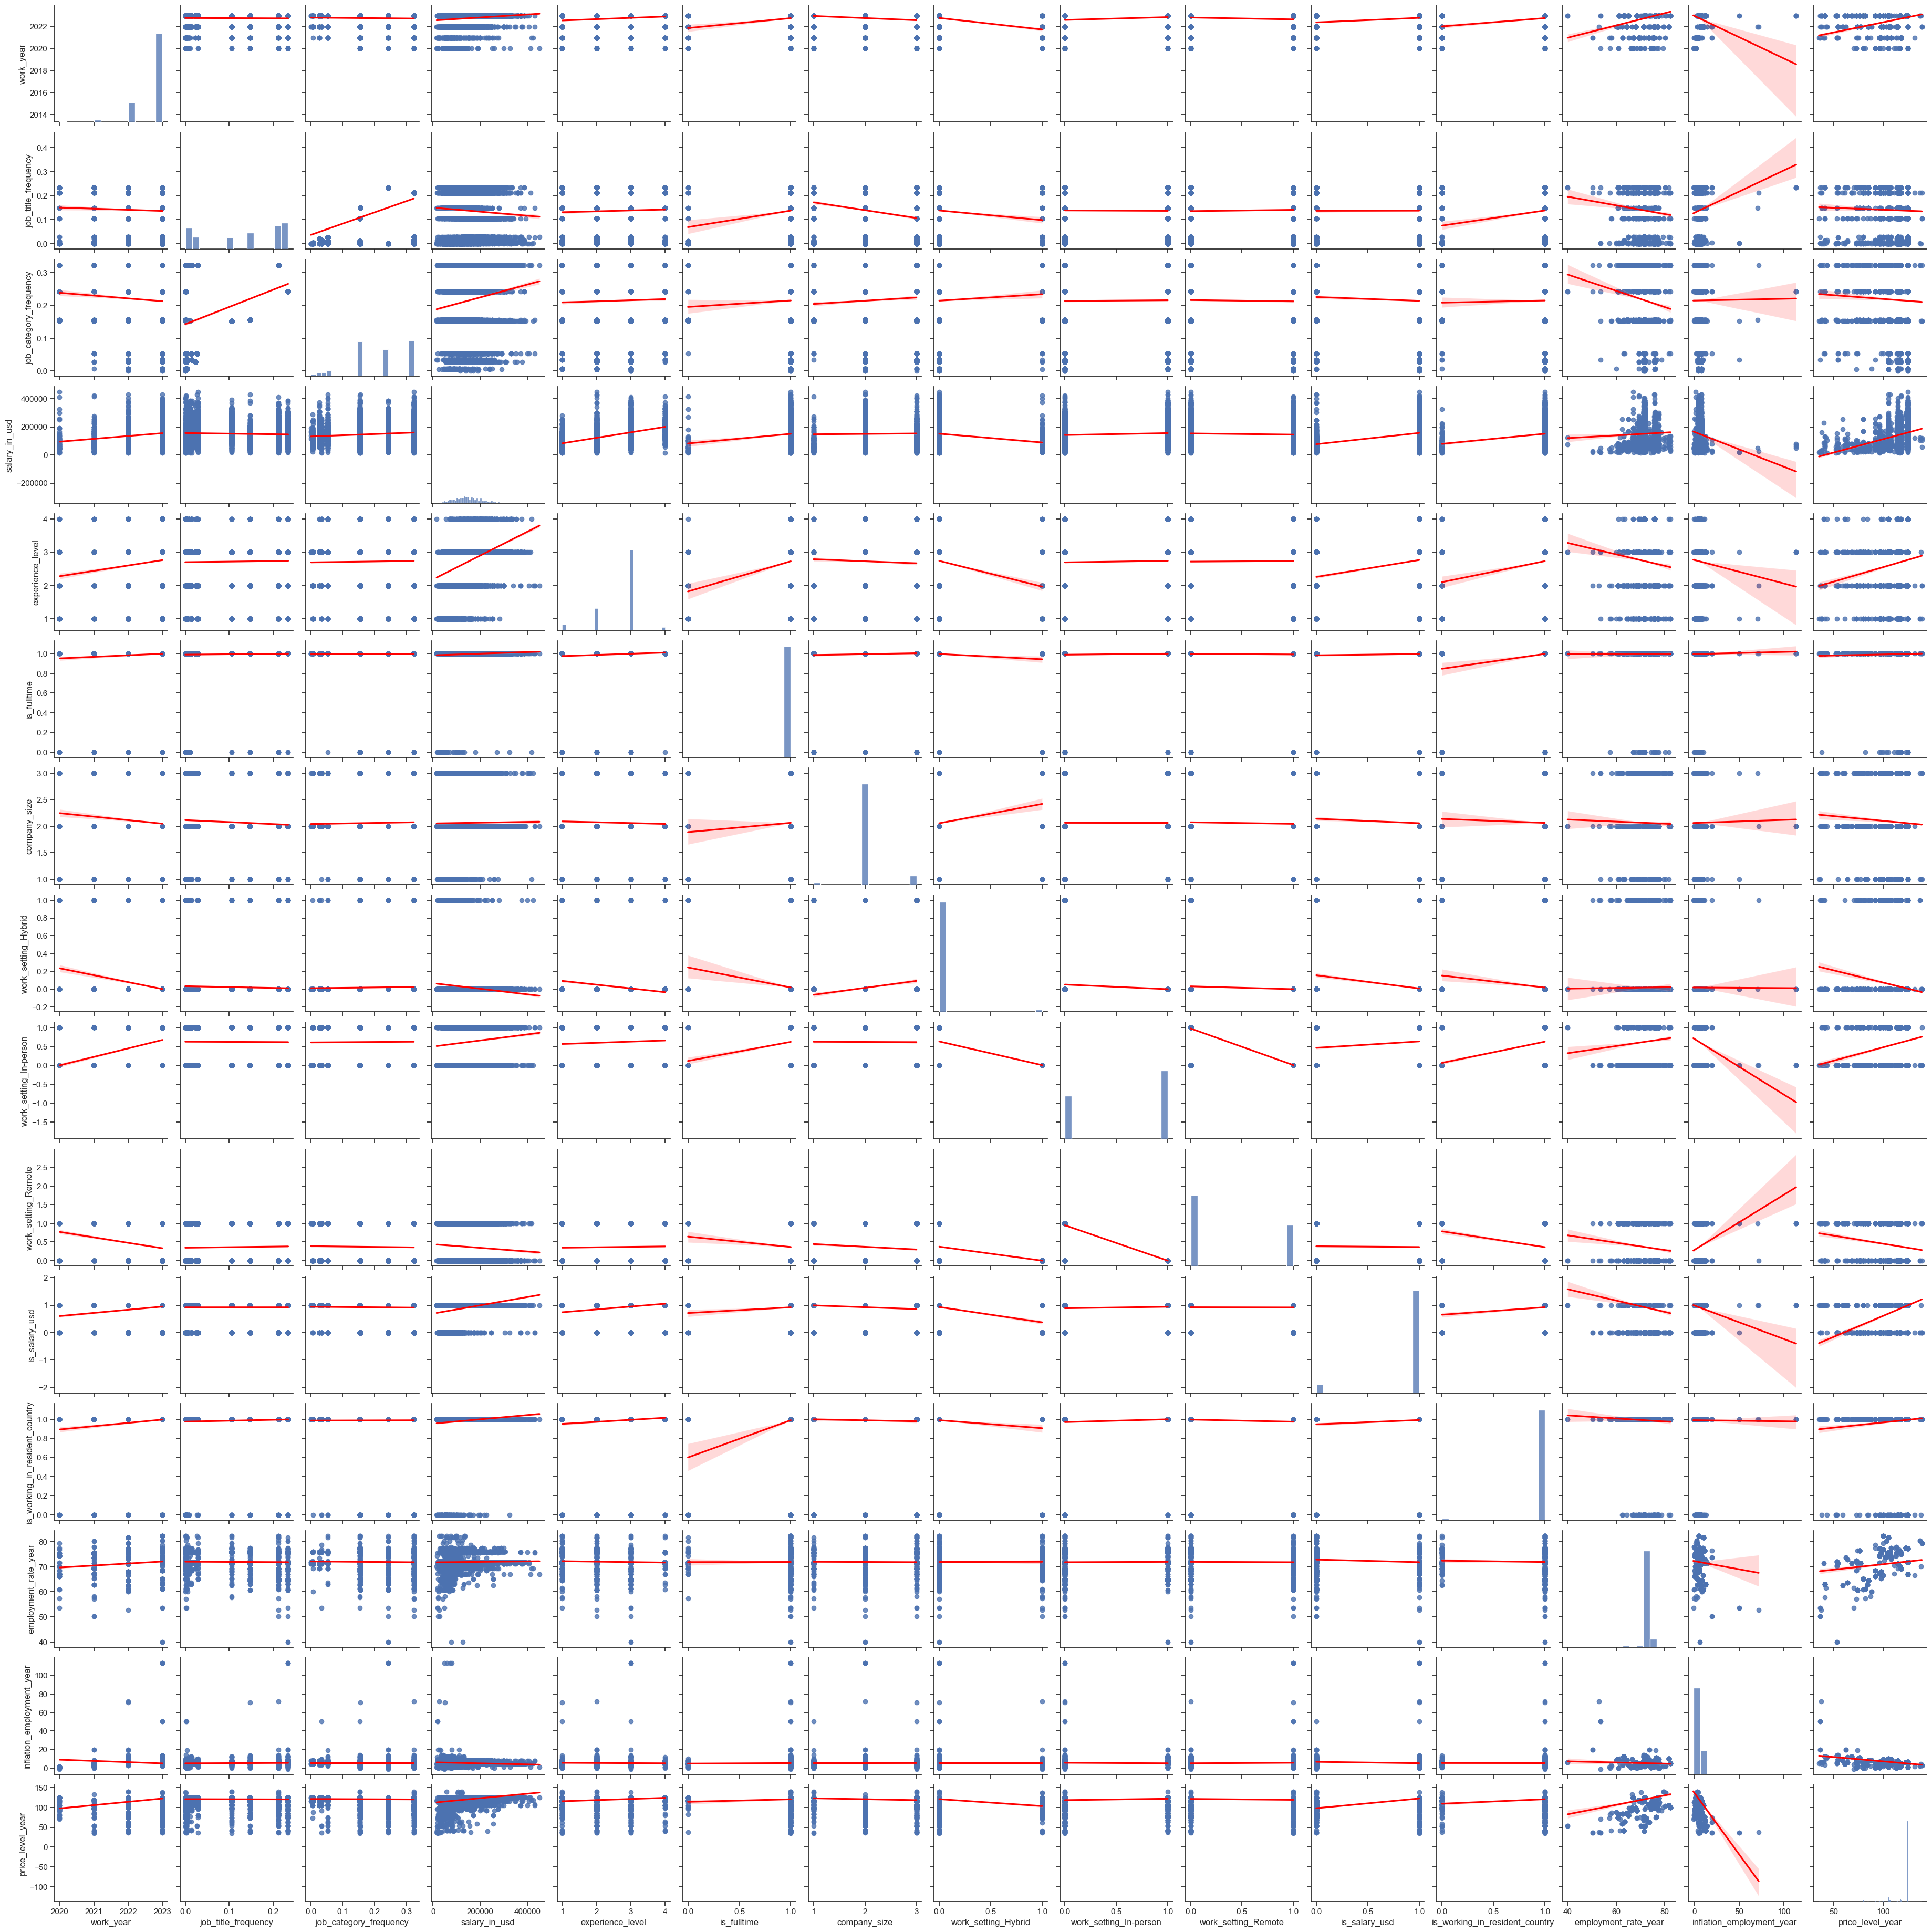

In [598]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(salary_data_encoded, kind="reg", plot_kws={'line_kws':{'color':'red'}});

#### Heatmap Correlation Matrix

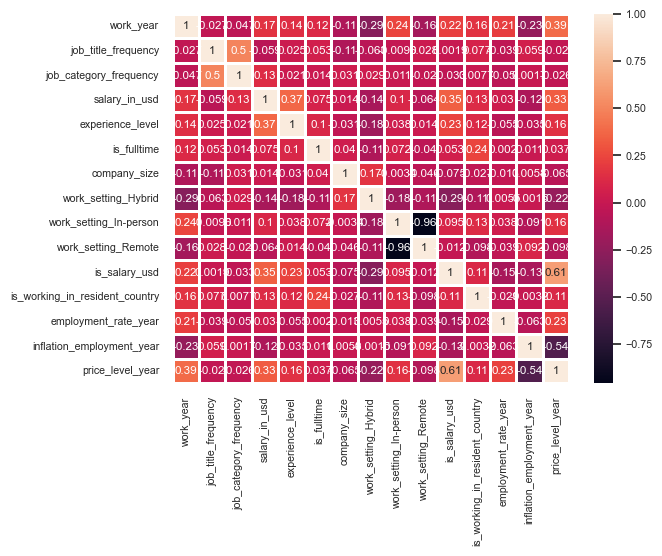

In [599]:
correlationMatrix = salary_data_encoded.corr();
sns.set(font_scale=0.7)
sns.heatmap(correlationMatrix, annot=True, linewidths=1);

By analyzing the correlation matrix, we can see the correlations between the parameters and salary.

As seen on the matrix, there are correlations worth working on such as experience level and salary currency.

# (TODO) Regression Models

# Linear Regression

### Train the regressor

#### Model Intercept

#### Model Coefficents

### Test the regressor

##### Results

# kNN Regression

### Train the regressor

### Test the regressor

##### Results

# Decision Tree Regression

### Train the regressor

### Test the regressor

##### Results

# Random Forest Regression

### Train the regressor

### Test the regressor

##### Results

# Results

##### R Squared Scores

##### Mean Squared Errors

##### Mean Absolute Errors

##### Mean Absolute Percentage Errors

### Comparison of Average Metrics

##### R Squared Score (for 10 runs)